# **Netflix Userbase Analysis**

## <span style="color: #006400;">**Introduction**</span>

This analysis delves into a comprehensive dataset of Netflix users, examining subscription types, monthly revenue, demographics, and key user characteristics. The dataset, featuring columns like User ID, Join Date, and Country, offers insights into patterns that shape the streaming platform's user landscape. The goal is to unveil key findings through exploratory data analysis, contributing to a nuanced understanding of user preferences and informing decisions for an enhanced Netflix experience.

## <span style="color: #006400;">**Data Description**</span>

- User ID: Unique identifier for each user.
- Subscription Type: Type of subscription (e.g., Basic, Standard, Premium).
- Monthly Revenue: Revenue generated from the user's subscription per month.
- Join Date: Date when the user joined Netflix.
- Last Payment Date: Date of the user's last payment.
- Country: User's location.
- Age: User's age.
- Gender: User's gender.
- Device: Device used to access Netflix (e.g., Mobile, Tablet, Computer).

In [ ]:
#Importing the necessary libraries

import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from scipy import stats


In [56]:
df = pd.read_csv('data/Netflix Userbase.csv', index_col='User ID')

In [57]:
df.sample(7)

,Subscription Type,Monthly Revenue,Join Date,Last Payment Date,Country,Age,Gender,Device,Plan Duration
User ID,,,,,,,,,
912,Premium,15,08-10-22,02-07-23,Canada,41,Male,Tablet,1 Month
2158,Standard,12,14-09-22,10-07-23,United Kingdom,46,Male,Smartphone,1 Month
775,Basic,11,20-10-22,28-06-23,United States,29,Male,Tablet,1 Month
2366,Premium,11,09-09-22,13-07-23,United States,43,Male,Smart TV,1 Month
2111,Basic,14,09-11-22,09-07-23,United States,47,Male,Laptop,1 Month
6,Premium,15,18-03-22,27-06-23,France,29,Female,Smart TV,1 Month
2139,Premium,14,12-07-22,08-07-23,Canada,34,Female,Smartphone,1 Month


In [58]:
#convert join date and last payment date into pandas date format 
df['Join Date'] = pd.to_datetime(df['Join Date'], format='mixed')
df['Last Payment Date'] = pd.to_datetime(df['Last Payment Date'], format='mixed')

#rename columns to ease the process in analysis
df = df.rename(columns = {'Subscription Type' : 'Sub_type', 
                          'Monthly Revenue' : 'Monthly_revenue', 'Join Date' : 'First_sub_date', 
                         'Last Payment Date' : 'Last_sub_date',
                         'Plan Duration' : 'Plan_duration'})

In [59]:
df.isnull().sum()

Sub_type           0
Monthly_revenue    0
First_sub_date     0
Last_sub_date      0
Country            0
Age                0
Gender             0
Device             0
Plan_duration      0
dtype: int64

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 2500
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Sub_type         2500 non-null   object        
 1   Monthly_revenue  2500 non-null   int64         
 2   First_sub_date   2500 non-null   datetime64[ns]
 3   Last_sub_date    2500 non-null   datetime64[ns]
 4   Country          2500 non-null   object        
 5   Age              2500 non-null   int64         
 6   Gender           2500 non-null   object        
 7   Device           2500 non-null   object        
 8   Plan_duration    2500 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 195.3+ KB


In [61]:
df.describe()

,Monthly_revenue,First_sub_date,Last_sub_date,Age
count,2500.000000,2500,2500,2500.000000
mean,12.508400,2022-07-30 08:06:43.200000,2023-06-21 10:33:36,38.795600
min,10.000000,2021-05-09 00:00:00,2023-01-07 00:00:00,26.000000
25%,11.000000,2022-06-15 00:00:00,2023-05-07 00:00:00,32.000000
50%,12.000000,2022-08-07 00:00:00,2023-06-28 00:00:00,39.000000
75%,14.000000,2022-10-09 00:00:00,2023-08-07 00:00:00,45.000000
max,15.000000,2023-12-01 00:00:00,2023-12-07 00:00:00,51.000000
std,1.686851,NaN,NaN,7.171778


In [62]:
df.nunique()

Sub_type             3
Monthly_revenue      6
First_sub_date     300
Last_sub_date       26
Country             10
Age                 26
Gender               2
Device               4
Plan_duration        1
dtype: int64

## <span style="color: #006400;">**Exploratory Data Analysis**</span>

**In this section EDA will be done to explore the variables in the data**

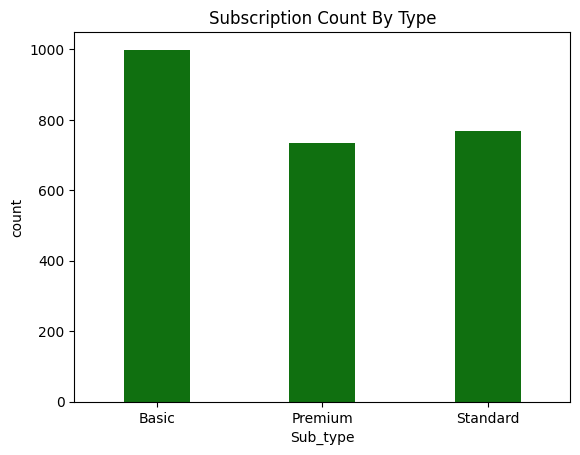

In [63]:
sns.countplot(data=df, x='Sub_type', color='green', width=0.4).set(title='Subscription Count By Type')
plt.show()

Most of user use basic plan of subscription with almost 1000 subscribes

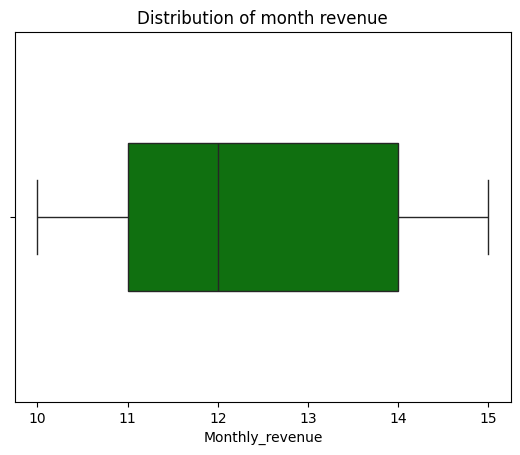

In [64]:
sns.boxplot(data=df, x='Monthly_revenue', color='green', width=.4).set(title='Distribution of month revenue')
plt.show()

Most of the revenue is around 11-14

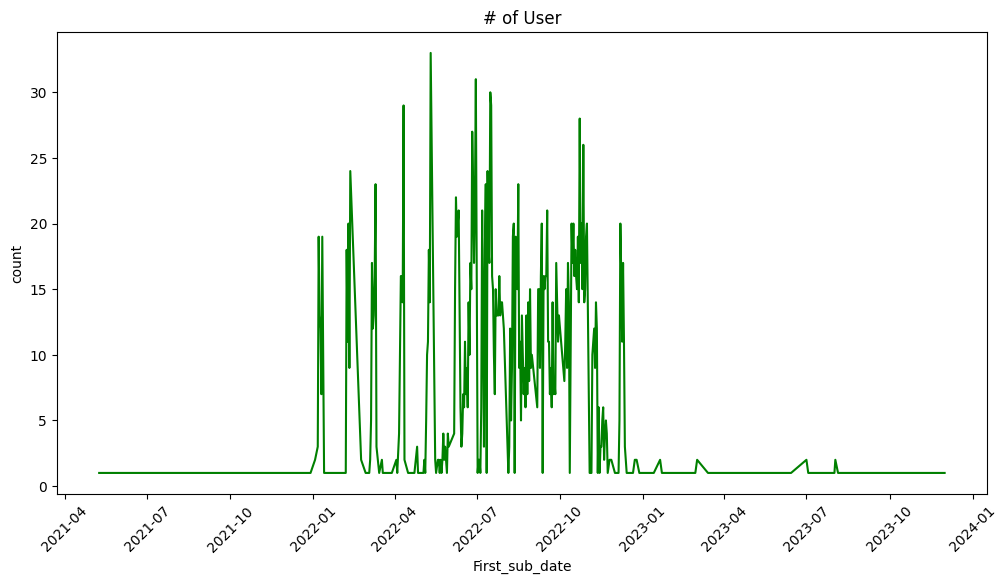

In [65]:
d1 = df['First_sub_date'].value_counts().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=d1, x='First_sub_date', y='count', color='green').set(title='# of User')
plt.xticks(rotation=45)
plt.show()

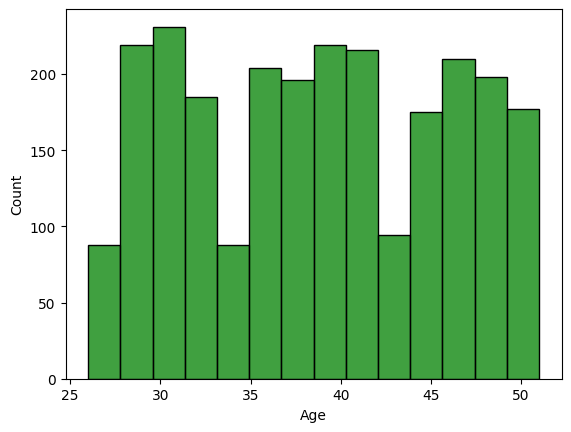

In [66]:
sns.histplot(data=df, x='Age', color='green')
plt.show()

The subscribers are 25+ to 50+ years old with the highest frequency on age 30, 40 and 46. The lowest frequency is on age 26, 34 and 44.

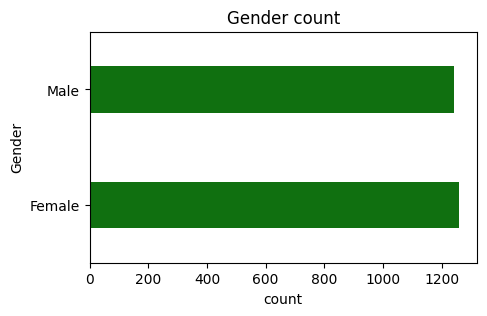

In [67]:
#count of gender 
plt.figure(figsize=(5, 3))  
sns.countplot(data=df, y='Gender', color='green', width=.4).set(title='Gender count')
plt.show()

The number of male and female subscribers are equal

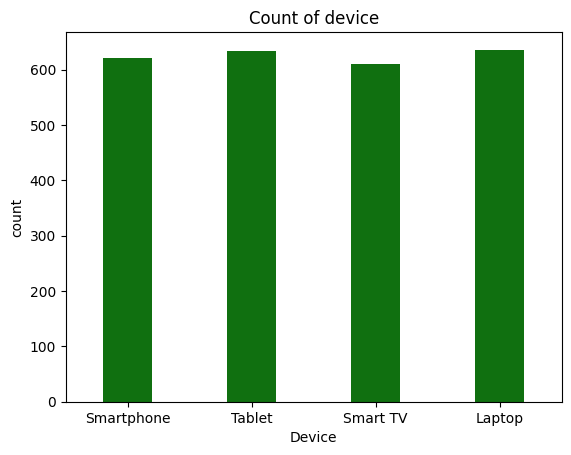

In [68]:
sns.countplot(data=df, x='Device', color='green', width=.4).set(title='Count of device')
plt.show()

Almost all kind of devices has equal number of user. The most used devices are tablet and laptop

In [69]:
df['Plan_duration'].unique()

array(['1 Month'], dtype=object)

All of the user has subscription plan fot 1 month

## <span style="color: #006400;">**EDA 2 variables or more**</span>

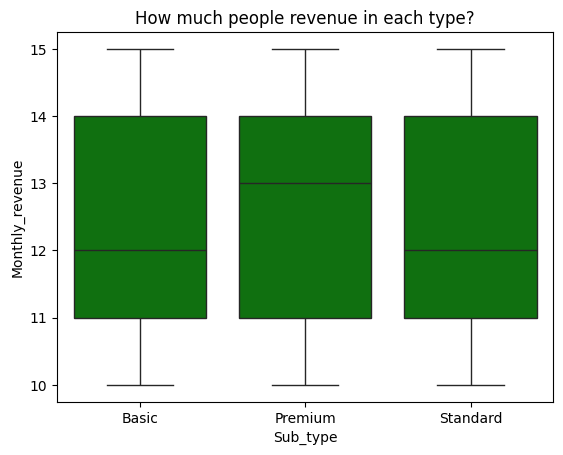

In [71]:
sns.boxplot(data=df, x='Sub_type', y='Monthly_revenue', color='green').set(title='How much people revenue in each type?')
plt.show()


The three subscription types have equal distribution of user's monthly revenue

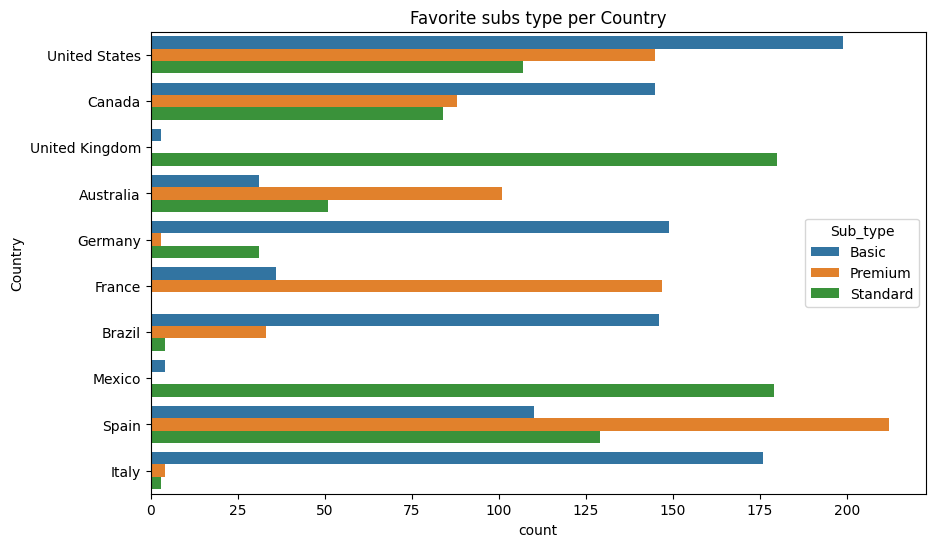

In [72]:
# Type of subs type across countries
plt.figure(figsize=(10, 6))
sns.countplot(data=df, y='Country', hue='Sub_type').set(title='Favorite subs type per Country')
plt.show()

From the plot we know which country where subs type most favored :

Basic : US, Canada, Germany, Brazil, Italy.
Premium : France, Spain, Australia.
Standard : Mexico, UK.

The number of countries which favor each subs type is proportional to level of the plan

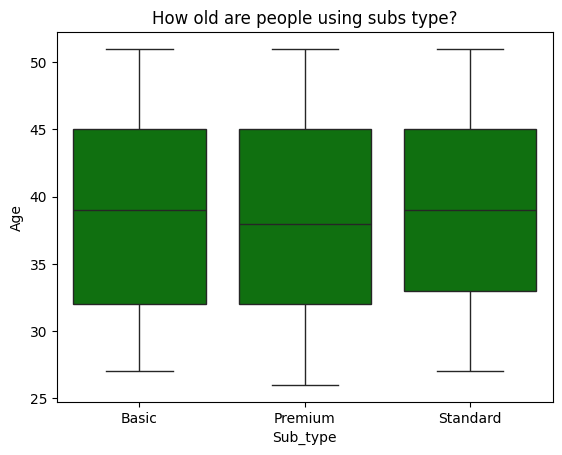

In [73]:
sns.boxplot(data=df, y='Age', x='Sub_type', color='green').set(title='How old are people using subs type?')
plt.show()

Basic and premium subs type almost has the same distribution(the difference is the minimum of age of premium subscribers which is younger). Standard subscribers has a little older than basic and premium

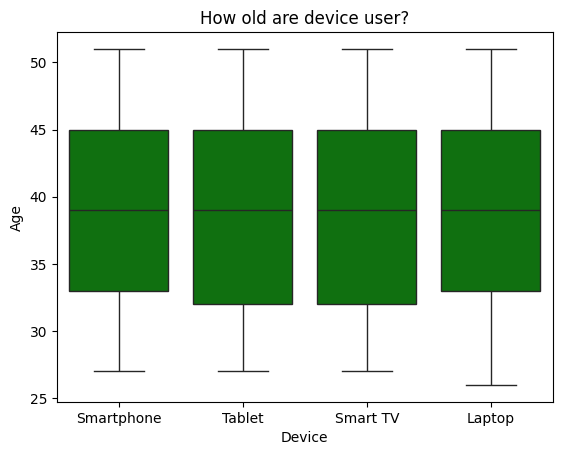

In [74]:
sns.boxplot(data=df, x='Device', y='Age', color='green').set(title='How old are device user?')
plt.show()

Tablet and Smart TV distribution of subscriber age is alike, laptop and smartphone too. Between all device type, laptop is device whose age of subscribers range is largest

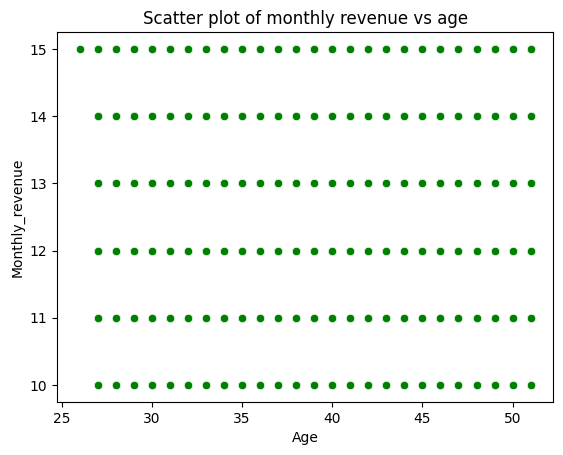

In [75]:
sns.scatterplot(data=df, x='Age', y='Monthly_revenue', color='green').set(title="Scatter plot of monthly revenue vs age")
plt.show()

## <span style="color: #006400;">**Analysis**</span>


In this section, analysis using statistical method will be done to analyze the data. In the data description, some analysis that can be done are user trend, preferences, and revenue generation

### **User trend**

User trend that can be analyzed from data is sub type and first sub date

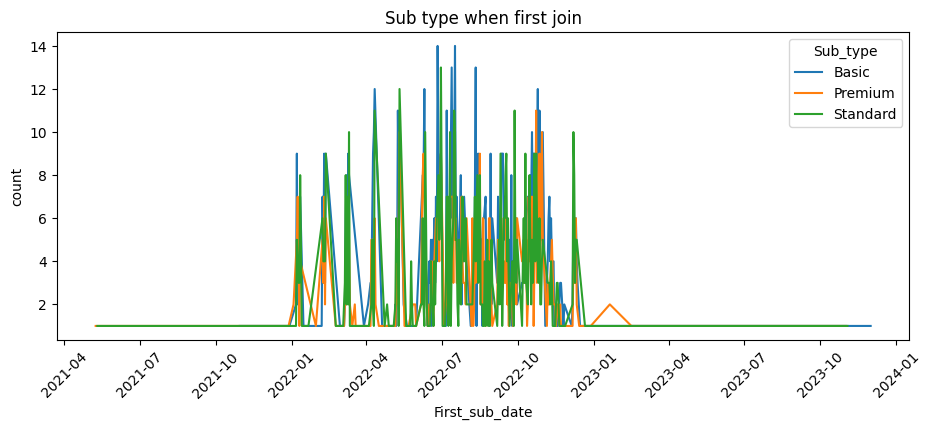

In [76]:
# number of customer for each plan when first join
basic_join_count = df[['First_sub_date', 'Sub_type']].query("Sub_type == 'Basic' ").value_counts().reset_index().rename(columns={"Count" : "count"})
premium_join_count = df[['First_sub_date', 'Sub_type']].query("Sub_type == 'Premium' ").value_counts().reset_index().rename(columns={"Count" : "count"})
standard_join_count = df[['First_sub_date', 'Sub_type']].query("Sub_type == 'Standard' ").value_counts().reset_index().rename(columns={"Count" : "count"}) 

#combine all data and plot
plan_join_count = pd.concat([basic_join_count, premium_join_count, standard_join_count], axis="index")

#plot the count for each plan
fig=plt.figure(figsize=(11,4))
sns.lineplot(data=plan_join_count, x='First_sub_date', y='count', hue='Sub_type', errorbar=None)
plt.xticks(rotation=45)
plt.title("Sub type when first join")
plt.show()

From plot above we know that :

- From 2021 till 2024 most of the plan bought is Standard plan
- The pattern of three plan is almost the same, the difference is only on the quantity
- We can see that the number of plan bought overtime is very fluctuative

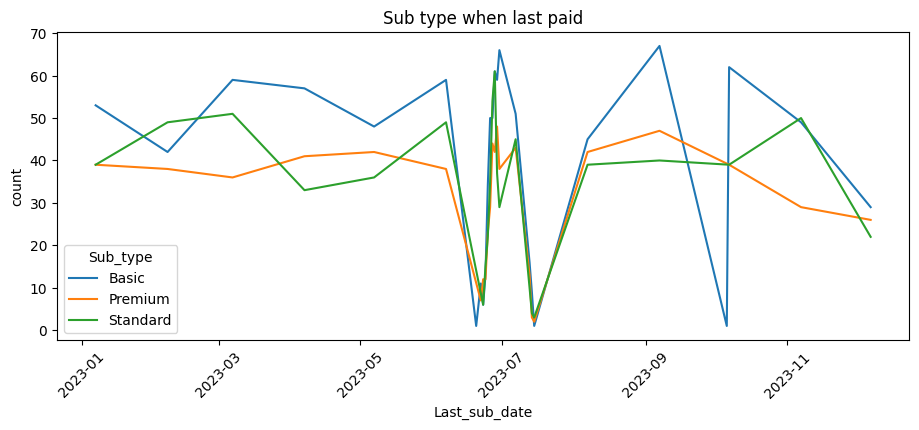

In [77]:
# number of customer for each plan when last paid
basic_last_count = df[['Last_sub_date', 'Sub_type']].query("Sub_type == 'Basic' ").value_counts().reset_index().rename(columns={"Count" : "count"})
premium_last_count = df[['Last_sub_date', 'Sub_type']].query("Sub_type == 'Premium' ").value_counts().reset_index().rename(columns={"Count" : "count"})
standard_last_count = df[['Last_sub_date', 'Sub_type']].query("Sub_type == 'Standard' ").value_counts().reset_index().rename(columns={"Count" : "count"}) 

#combine all data and plot
plan_last_count = pd.concat([basic_last_count, premium_last_count, standard_last_count], axis="index")

#plot the count for each plan
fig=plt.figure(figsize=(11,4))
sns.lineplot(data=plan_last_count, x='Last_sub_date', y='count', hue='Sub_type', errorbar=None)
plt.xticks(rotation=45)
plt.title("Sub type when last paid")
plt.show()

Same as when first join, the number of use per subs plan is fluctuative

### **User preferences**

The preferences that will be analyzed is prefered device

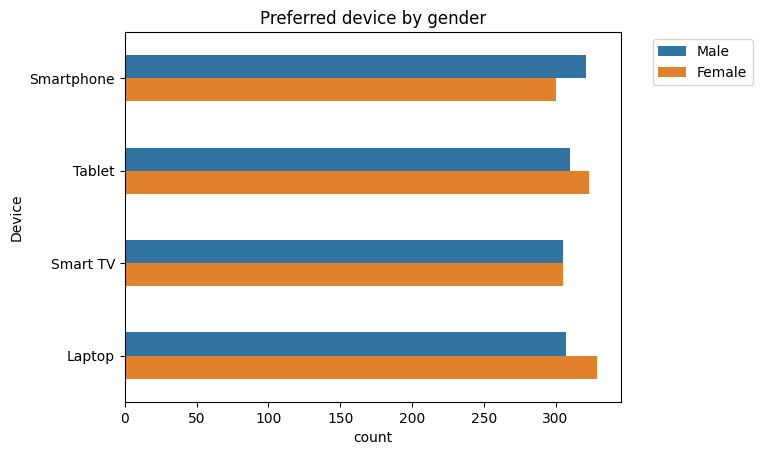

In [78]:
sns.countplot(data=df, y='Device', hue='Gender', width=.5).set(title='Preferred device by gender')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

From the plot above we know that :

- Female prefers use tablet and laptop than male
- Male prefers use smartphone than female
- Both female and male has same preferences on smart tv

In [79]:
# prefered device in each country
country_device  = df.groupby('Country')['Device'].apply(lambda x: x.value_counts().index[0]).reset_index().sort_values(by='Device')
country_device.sort_values(by='Device')

,Country,Device
3,France,Laptop
4,Germany,Laptop
5,Italy,Laptop
9,United States,Laptop
7,Spain,Smart TV
0,Australia,Smartphone
1,Brazil,Smartphone
8,United Kingdom,Smartphone
2,Canada,Tablet
6,Mexico,Tablet


Most countries in Europe prefers laptop. Most countries in America prefers tablet.

### **Testing is the age of sub type is same or not**

In this hypotesis testing, the mean of age for each subs plan will compared and tested if the means are same. The method used in this anaylsis is one way anova

In [80]:
# define the data 
age_plan_df = pd.DataFrame({'basic' : df[df['Sub_type'] == 'Basic']['Age'],
                             'premium' : df[df['Sub_type'] == 'Premium']['Age'],
                             'standard' : df[df['Sub_type'] == 'Standard']['Age'],
                             })

There are assumptions needed for anova test. They are normality, equal variance, and independence of the data. Normality and equality of variance test will be done using hypotesis testing

​For normality:

Hypotesis
- H_0 : data is normally distributed
- H_1 : data is not normally distributed

1. Level of significance : α is 0.05

2. Test statistic : The value obtained from p-value

3. Acceptance region : The H_0 rejected if p-value <  α
 
4. Conclusion

For equality of variance

Hypotesis

- σ1 = σ2 = σ3 = σ4: no variance difference across all group
- σ1 ≠ σ2, i=1,2,3,4; j=1,2,3,4: there is variance difference across the group

1. Level of significance : α is 0.05
2. Test statistic : The value obtained from p-value
3. Acceptance region : The H_0 rejected if p-value < α
4. Conclusion



In [81]:
#equality of variance test using  bartlet test because the data seems normal (by boxplot) 
test_statistic, p_value = stats.bartlett(age_plan_df['basic'].dropna(), age_plan_df['premium'].dropna(), age_plan_df['standard'].dropna()) 
print(f"The bartlett test statistic is {test_statistic}")
print(f"The p-value of bartlett test is {p_value}")
print("Conclusion :")
if p_value < 0.05:
      print(f"P-value is {p_value} < 0.05 so there is no difference of age variance for subs plan group")
else : print(f"P-value is {p_value} >= 0.05 so the variance of age for subs plan group is equal")

The bartlett test statistic is 1.185117653003982
The p-value of bartlett test is 0.5529106705954039
Conclusion :
P-value is 0.5529106705954039 >= 0.05 so the variance of age for subs plan group is equal


In [82]:
#normality test using kolmogorov smirnov
for col in age_plan_df:
    test_statistic, p_value = stats.kstest(age_plan_df[col].dropna(), 'norm')[:2]
    print(f"The ks test statistic is {test_statistic}")
    print(f"The p-value of ks test is {p_value}")
    print("Conclusion :")
    if p_value < 0.05:
      print(f"P-value is {p_value} < 0.05 so data is not normally distributed")
    else : print(f"P-value is ${p_value} \geq 0.05$ so data is normally distributed")

The ks test statistic is 1.0
The p-value of ks test is 0.0
Conclusion :
P-value is 0.0 < 0.05 so data is not normally distributed
The ks test statistic is 1.0
The p-value of ks test is 0.0
Conclusion :
P-value is 0.0 < 0.05 so data is not normally distributed
The ks test statistic is 1.0
The p-value of ks test is 0.0
Conclusion :
P-value is 0.0 < 0.05 so data is not normally distributed


Because the data is not normal, the alternative test will be used.



In [83]:
# kruskal wallis
test_statistic, p_value = stats.kruskal(age_plan_df['basic'].dropna(), age_plan_df['premium'].dropna(), age_plan_df['standard'].dropna()) 
print(f"The kruskal wallis test statistic is {test_statistic}")
print(f"The p-value of kruskal wallis test is {p_value}")
print("Conclusion :")
if p_value < 0.05:
      print(f"P-value is {p_value} < 0.05 so there is unequality of median across the subs plan grorup")
else : print(f"P-value is ${p_value} >= 0.05$ so the median across subs plan group is equal")

The kruskal wallis test statistic is 1.9714940002584567
The p-value of kruskal wallis test is 0.3731603719512023
Conclusion :
P-value is $0.3731603719512023 >= 0.05$ so the median across subs plan group is equal


From the kruskal wallis test we can conclude that the median of age across the subs plan group is same



### **Testing is the monthly revenue of gender is same or not**

In this hypotesis testing, the mean of age for each gender will compared and tested if the means are same. The method used in this anaylsis is t test

In [84]:
# define the data 
male_monthly_revenue = df[df['Gender'] == 'Male']['Monthly_revenue']
female_monthly_revenue = df[df['Gender'] == 'Female']['Monthly_revenue']

# normality test function
def ks_test_normality(data):
    test_statistic, p_value = stats.kstest(data, 'norm')[:2]
    print(f"The ks test statistic is {test_statistic}")
    print(f"The p-value of ks test is {p_value}")
    print("Conclusion :")
    if p_value < 0.05:
      print(f"P-value is {p_value} < 0.05 so data is not normally distributed")
    else : print(f"P-value is {p_value} >= 0.05 so data is normally distributed")

In [85]:
# normality test 
ks_test_normality(male_monthly_revenue) 
ks_test_normality(female_monthly_revenue)

The ks test statistic is 1.0
The p-value of ks test is 0.0
Conclusion :
P-value is 0.0 < 0.05 so data is not normally distributed
The ks test statistic is 1.0
The p-value of ks test is 0.0
Conclusion :
P-value is 0.0 < 0.05 so data is not normally distributed


The data for both groups is not normal. There are some ways to solve this. We can transform the data or use the non-parametric test like Mann Whitney U. In this problem, I will use transformation



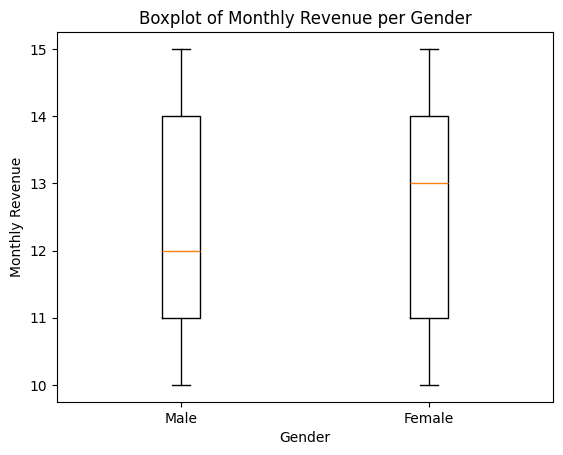

In [86]:
plt.boxplot([male_monthly_revenue, female_monthly_revenue])
plt.title("Boxplot of Monthly Revenue per Gender")
plt.xlabel("Gender")
plt.xticks(ticks=[1,2], labels=["Male", "Female"])
plt.ylabel("Monthly Revenue")
plt.show()

As we can see that on male, most of the value above the median meanwhile for the female, most of the value is under the median. The transformation used for male will be done by decreasing the value, meanwhile for female will be done by increasing



In [87]:
# try different transformation for female 
male_transformed = np.log(male_monthly_revenue)
female_transformed = female_monthly_revenue**3

# normality test
ks_test_normality(male_transformed)
ks_test_normality(female_transformed)

The ks test statistic is 0.9893489006582998
The p-value of ks test is 0.0
Conclusion :
P-value is 0.0 < 0.05 so data is not normally distributed
The ks test statistic is 1.0
The p-value of ks test is 0.0
Conclusion :
P-value is 0.0 < 0.05 so data is not normally distributed


After trying many transformation, no suitable transformation found. So box cox transformation will be tried to the data



Lambda value used for Transformation: 0.7227157303819833


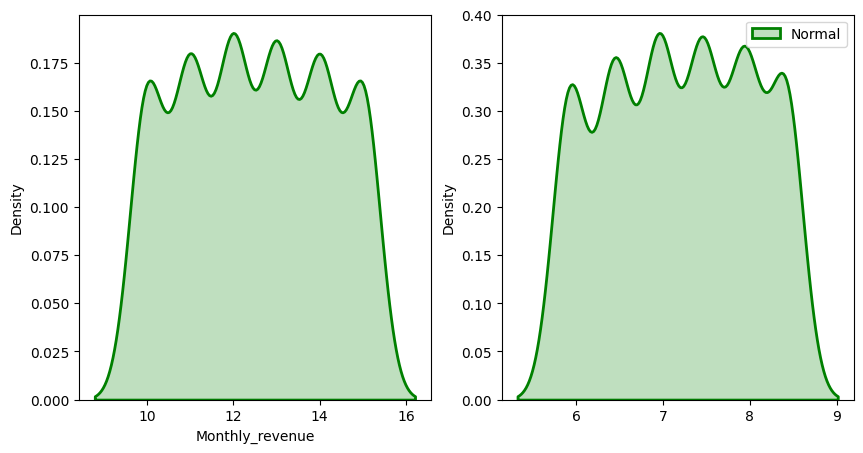

In [88]:
fitted_data_male, fitted_lambda_male = stats.boxcox(male_monthly_revenue)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and fitted data (normal)
sns.distplot(male_monthly_revenue, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data_male, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda_male}")

Lambda value used for Transformation: 0.7227157303819833


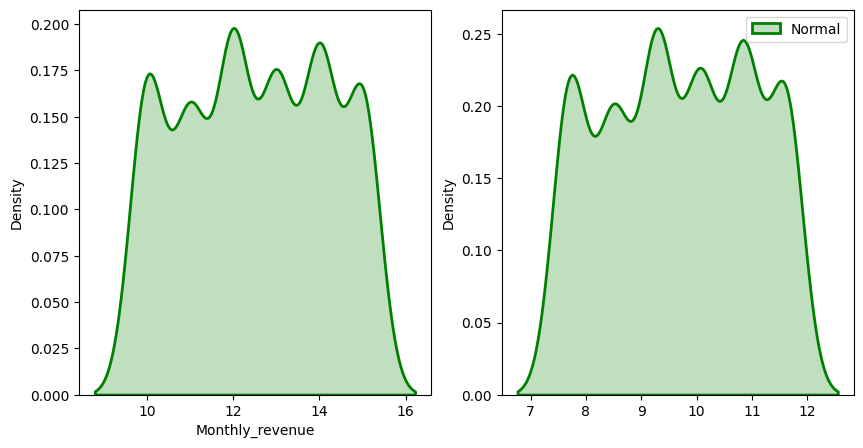

In [89]:
fitted_data_female, fitted_lambda_female = stats.boxcox(female_monthly_revenue)
 
# creating axes to draw plots
fig, ax = plt.subplots(1, 2)
 
# plotting the original data(non-normal) and fitted data (normal)
sns.distplot(female_monthly_revenue, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(fitted_data_female, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
# adding legends to the subplots
plt.legend(loc = "upper right")
 
# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {fitted_lambda_male}")


After using the box cox transformation, the data seems cannot be transformed into normal distribution. So mann whitney u test will be used. Some assumptions need to be fulfilled before doing mann whitney u test :

1. Dependent variable is ordinal or continuous
2. Independent variables should consist of two categorical variables
3. Independence of observation
4. The two variables are not normally distributed. The shape of two category is same

From all assumptions above, all assumptions are fulfilled so mann whitney test can be done

For mann whitney u test

Hypotesis
- μ(male) = μ(female): No mean of monthly revenue difference between female and male
- μ(male) = μ(female): There is difference of monthly revenue between female and male

1. Level of significance : α is 0.05
2. Test statistic : The value obtained from p-value
3. Acceptance region : The H_0 rejected if p-value < α
 
Conclusion

In [90]:
# mann whitney u test
print(stats.mannwhitneyu(male_monthly_revenue, female_monthly_revenue))

MannwhitneyuResult(statistic=775585.0, pvalue=0.751232906998015)


The p-value is 0.751 and bigger than 0.05. We dont have enough proof to reject the hypotesis null. Thus we can conclude that the mean of male monthly revenue and female monthly revenue is equal



## **Conclusion and Solution**

### **Conclusion**

The Netflix user data analysis project has provided valuable insights into user preferences and characteristics on the platform. Based on the data analysis, the following conclusions can be drawn:

- The most popular subscription plan is the Basic plan, used by the majority of users. However, the Standard and Premium plans also have a significant number of users.

- Monthly revenue primarily concentrates around 11-14 currency units, indicating that this price range is acceptable to users. This suggests that increasing prices may lead to negative user reactions.

- Users predominantly fall into the age range of 25 to 50, with the highest frequency at ages 30, 40, and 46. This demonstrates that Netflix targets a broad and diverse user demographic.

- The gender distribution of users is balanced, with no significant difference between males and females. This indicates that Netflix appeals to both genders.

- The devices used to access Netflix are diverse, with tablets and laptops being the most popular devices. Smartphones and Smart TVs are also used significantly. This highlights the importance of optimizing the user experience on these devices to enhance user satisfaction.


### **Solution**

Based on the above conclusions, here are some solutions to improve the user experience and enhance the success of Netflix:

- Research and tailor the service plans: Pay particular attention to the Basic plan and investigate ways to improve its value and attractiveness to attract more users.

- Enhance diverse and relevant content: Continue developing diverse and high-quality content while understanding user preferences and requirements to provide suitable content and increase user engagement.

- Optimize the experience on popular devices: Strengthen the development of the Netflix application for tablets, laptops, smartphones, and Smart TVs, ensuring a smooth and compatible experience across all devices.

- Offer promotions and incentives: To attract new users and maintain the satisfaction of existing users, Netflix can provide special promotions and incentives for its service plans.

- Conduct market research and expand internationally: Continuously conduct market research and expand internationally to strengthen Netflix's presence globally. Understand the culture and specific demands of each market to customize content and business strategies.

- Improve interface and user experience: Enhance the user-friendly interface, ease of use, and optimize the user experience across different platforms and devices.

- Enhance recommendation and content suggestion capabilities: Utilize artificial intelligence technology to provide personalized and reliable content recommendations, helping users discover new content and increasing interaction.

- Strengthen customer care and feedback: Build a good customer care system and respond promptly to user feedback and requests.